# Electric Vehicle EDA Analysis

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv(r"C:\Users\Veena\OneDrive\Desktop\eletronic_vechicle_dataset.csv")
df.head()

VIN (1-10)     County      City State  Postal Code  Model Year       Make  \
0  JTMEB3FV6N     Monroe  Key West    FL        33040        2022     TOYOTA   
1  1G1RD6E45D      Clark  Laughlin    NV        89029        2013  CHEVROLET   
2  JN1AZ0CP8B     Yakima    Yakima    WA        98901        2011     NISSAN   
3  1G1FW6S08H     Skagit  Concrete    WA        98237        2017  CHEVROLET   
4  3FA6P0SU1K  Snohomish   Everett    WA        98201        2019       FORD   

        Model                   Electric Vehicle Type  \
0  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
1        VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
2        LEAF          Battery Electric Vehicle (BEV)   
3     BOLT EV          Battery Electric Vehicle (BEV)   
4      FUSION  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible              42   
1           Clean Alternative Fuel Vehicle Eligible              38   
2           Clean Alternative Fuel Vehicle Eligible              73   
3           Clean Alternative Fuel Vehicle Eligible             238   
4             Not eligible due to low battery range              26   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                   NaN       198968248   
1          0                   NaN         5204412   
2          0                  15.0       218972519   
3          0                  39.0       186750406   
4          0                  38.0         2006714   

              Vehicle Location        Electric Utility  2020 Census Tract  
0    POINT (-81.80023 24.5545)                     NaN        12087972100  
1  POINT (-114.57245 35.16815)                     NaN        32003005702  
2  POINT (-120.50721 46.60448)              PACIFICORP        53077001602  
3   POINT (-121.7515 48.53892)  PUGET SOUND ENERGY INC        53057951101  
4  POINT (-122.20596 47.97659)  PUGET SOUND ENERGY INC        53061041500

In [3]:
df.shape

(112634, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [5]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                 20
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 286
DOL Vehicle ID                                         0
Vehicle Location                                      24
Electric Utility                                     443
2020 Census Tract                                      0
dtype: int64

In [6]:
print("Missing values before imputation:")
print(df.isnull().sum())

# 1. Fill missing values in 'Model' (categorical variable) with mode
df['Model'].fillna(df['Model'].mode()[0], inplace=True)

# 2. Fill missing values in 'Legislative District' (numerical variable) with median
df['Legislative District'].fillna(df['Legislative District'].median(), inplace=True)

# 3. Fill missing values in 'Vehicle Location' (categorical variable) with a placeholder
df['Vehicle Location'].fillna('Unknown', inplace=True)

# 4. Fill missing values in 'Electric Utility' (categorical variable) with mode
df['Electric Utility'].fillna(df['Electric Utility'].mode()[0], inplace=True)

# Check for missing values after imputation
print("\nMissing values after imputation:")
print(df.isnull().sum())

Missing values before imputation:
VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                 20
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 286
DOL Vehicle ID                                         0
Vehicle Location                                      24
Electric Utility                                     443
2020 Census Tract                                     

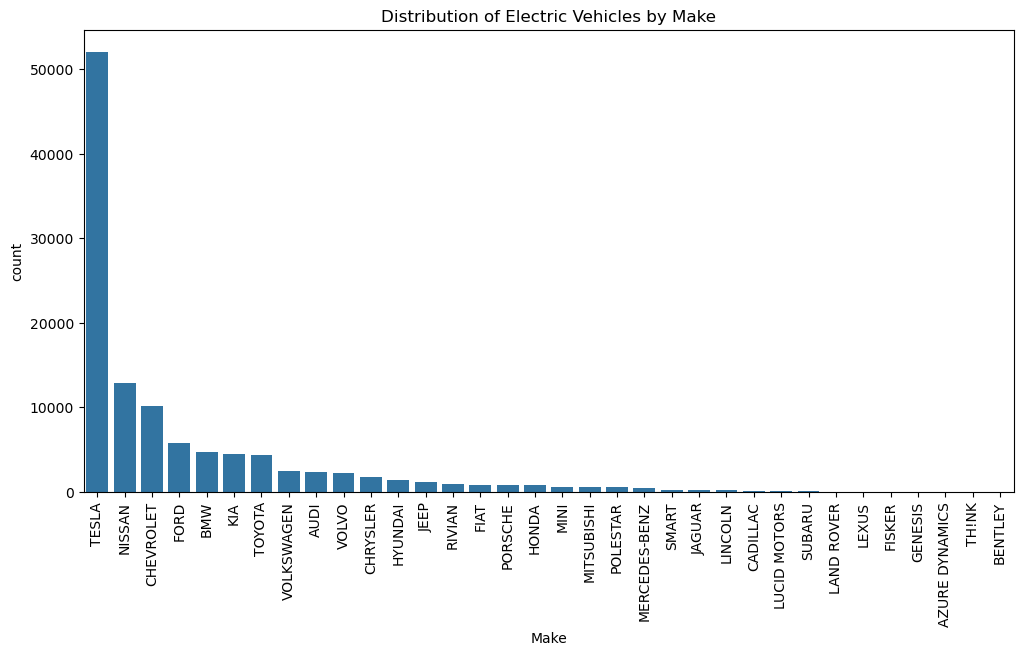

In [7]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Make', order=df['Make'].value_counts().index)
plt.title('Distribution of Electric Vehicles by Make')
plt.xticks(rotation=90)
plt.show()



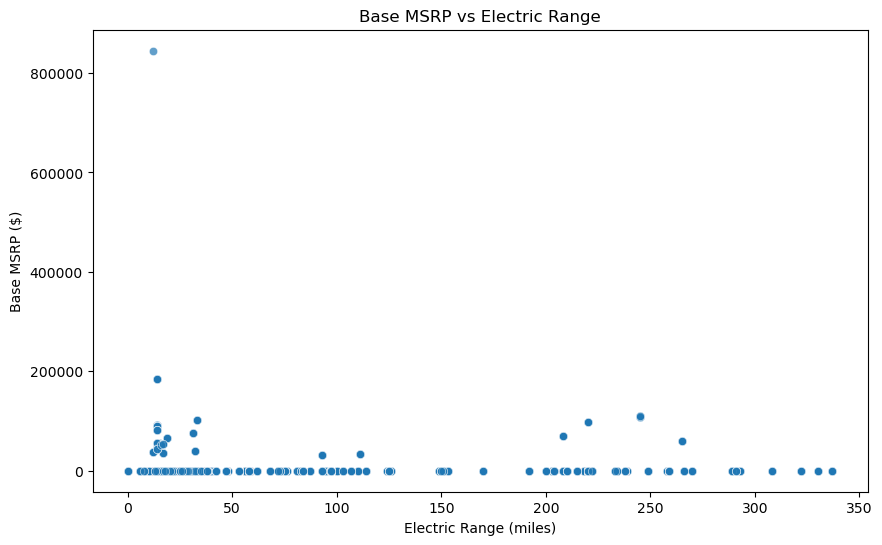

In [8]:
# Scatter plot of Base MSRP vs Electric Range
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Electric Range', y='Base MSRP',  alpha=0.7)
plt.title('Base MSRP vs Electric Range')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Base MSRP ($)')
plt.show()

#  Summary Statistics

In [9]:
df.describe()


Postal Code     Model Year  Electric Range      Base MSRP  \
count  112634.000000  112634.000000   112634.000000  112634.000000   
mean    98156.226850    2019.003365       87.812987    1793.439681   
std      2648.733064       2.892364      102.334216   10783.753486   
min      1730.000000    1997.000000        0.000000       0.000000   
25%     98052.000000    2017.000000        0.000000       0.000000   
50%     98119.000000    2020.000000       32.000000       0.000000   
75%     98370.000000    2022.000000      208.000000       0.000000   
max     99701.000000    2023.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         112634.000000    1.126340e+05       1.126340e+05  
mean              29.816254    1.994567e+08       5.296650e+10  
std               14.683387    9.398427e+07       1.699104e+09  
min                1.000000    4.777000e+03       1.101001e+09  
25%               18.000000    1.484142e+08       5.303301e+10  
50%               34.000000    1.923896e+08       5.303303e+10  
75%               43.000000    2.191899e+08       5.305307e+10  
max               49.000000    4.792548e+08       5.603300e+10

# Observations:

+ High Average Price: The typical electric vehicle costs about $98,156, indicating they are generally expensive compared to regular cars.

+ Variable Electric Range: On average, these vehicles can travel 87.8 miles on a single charge, but some can go as far as 337 miles, while others have very low ranges.

+ Mostly New Models: The average model year is 2019, showing that most vehicles in this dataset are fairly new and likely equipped with the latest technology.

+ Wide Price Range: Prices vary significantly, from as low as Dollors 1,730  to  nearly Dollors 99,701, meaning there are options for different budgets, though most are on the higher end.

# Univariate Analysis

# Distribution of Electric Range

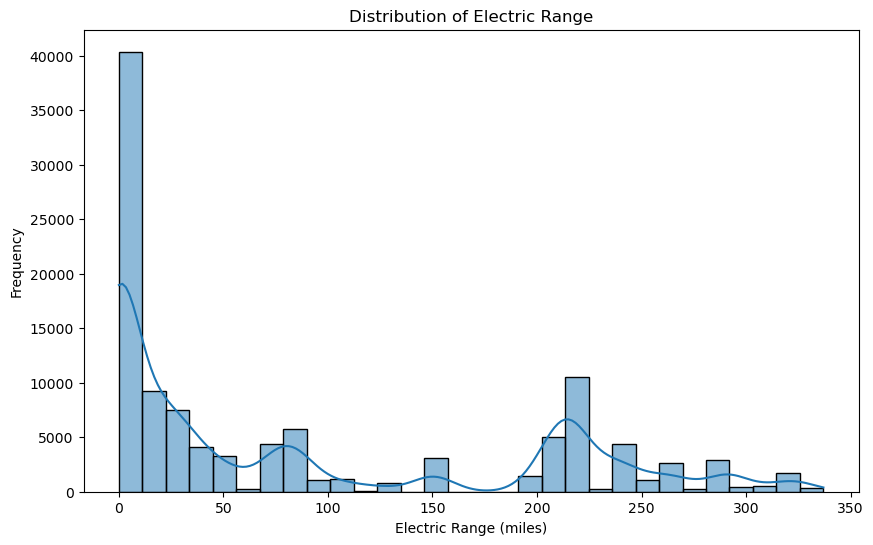

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['Electric Range'], bins=30, kde=True)
plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Frequency')
plt.show()


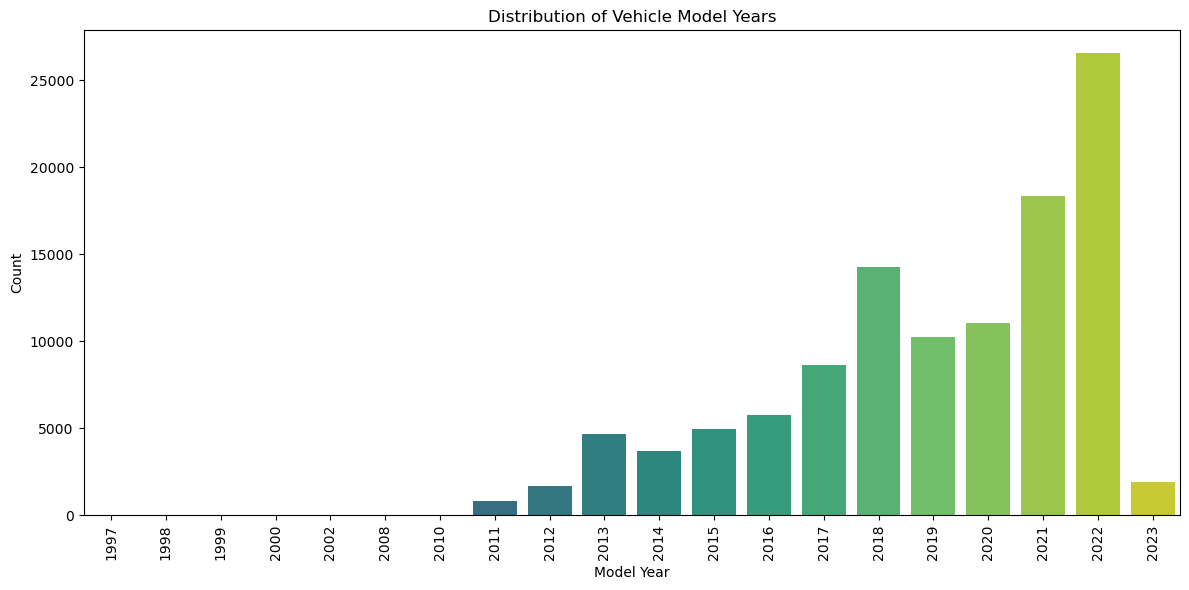

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a count plot for 'Model Year'
sns.countplot(data=df, x='Model Year', palette='viridis')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Add title and labels
plt.title('Distribution of Vehicle Model Years')
plt.xlabel('Model Year')
plt.ylabel('Count')

# Show the plot
plt.tight_layout()  # Adjust the layout to make room for the labels
plt.show()


# Count of Vehicle Makes

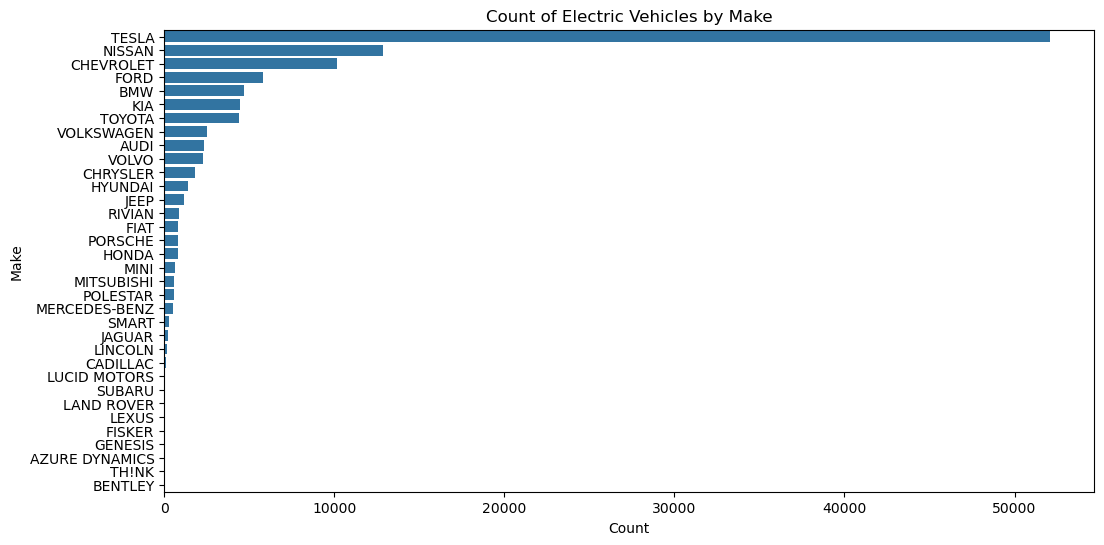

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Make', order=df['Make'].value_counts().index)
plt.title('Count of Electric Vehicles by Make')
plt.xlabel('Count')
plt.ylabel('Make')
plt.show()


# Top ten models


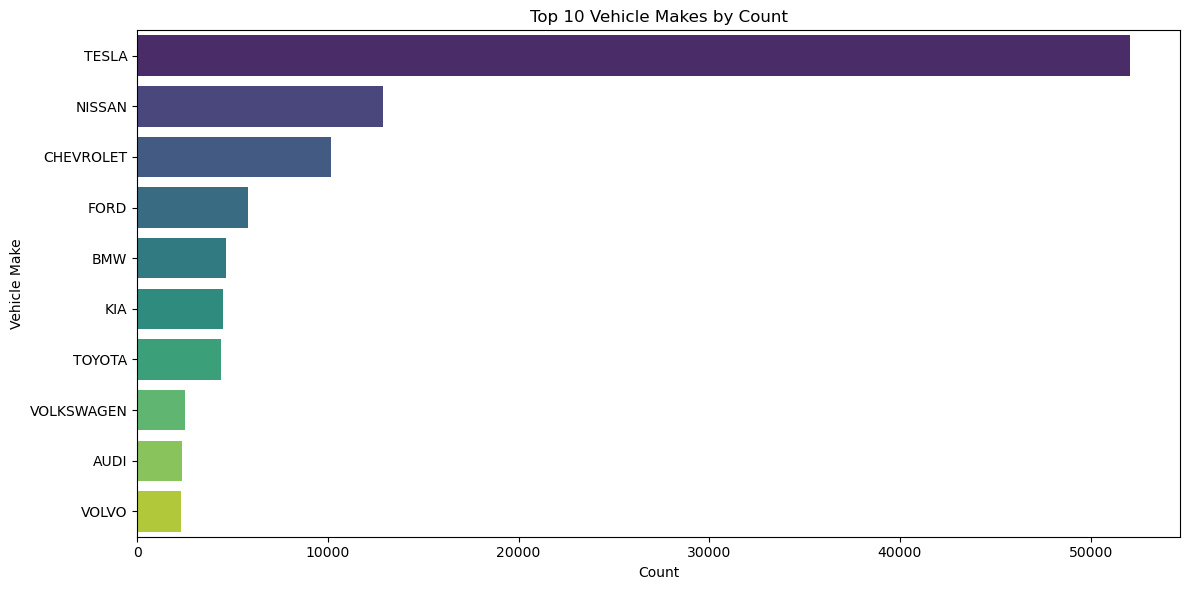

In [13]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Get the top 10 vehicle makes by count
top_10_makes = df['Make'].value_counts().nlargest(10)

# Create a bar plot for the top 10 vehicle makes using their counts
sns.barplot(x=top_10_makes.values, y=top_10_makes.index, palette='viridis')

# Add title and labels
plt.title('Top 10 Vehicle Makes by Count')
plt.xlabel('Count')
plt.ylabel('Vehicle Make')

# Show the plot
plt.tight_layout()  # Adjust the layout to make room for the labels
plt.show()


#  CAFV Eligibility

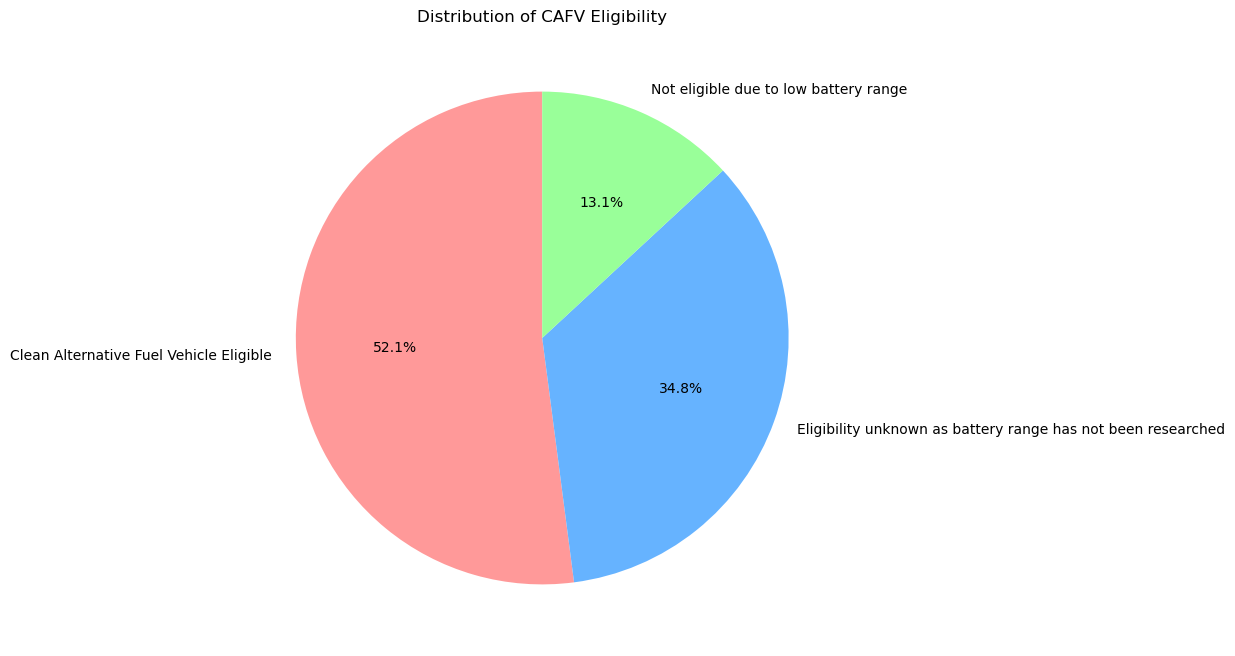

In [14]:
# Set the figure size
plt.figure(figsize=(8, 8))

# Get the counts of each category in CAFV eligibility
cafv_counts = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

# Define custom colors (you can choose your own colors)
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']  # Add or modify colors as needed

# Create a pie chart with custom colors
cafv_counts.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8, 8), colors=colors)

# Add title
plt.title('Distribution of CAFV Eligibility')

# Show the plot
plt.ylabel('')  # Hide the y-label for aesthetics
plt.show()


# Bivariate Analysis

# Electric Range vs. Base MSRP

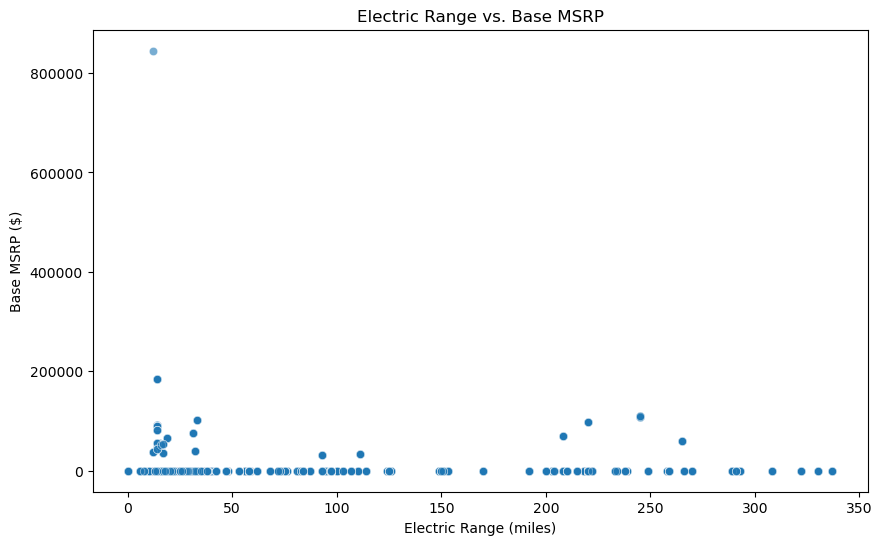

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Electric Range', y='Base MSRP', alpha=0.6)
plt.title('Electric Range vs. Base MSRP')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Base MSRP ($)')
plt.show()


#  Electric Range by Make

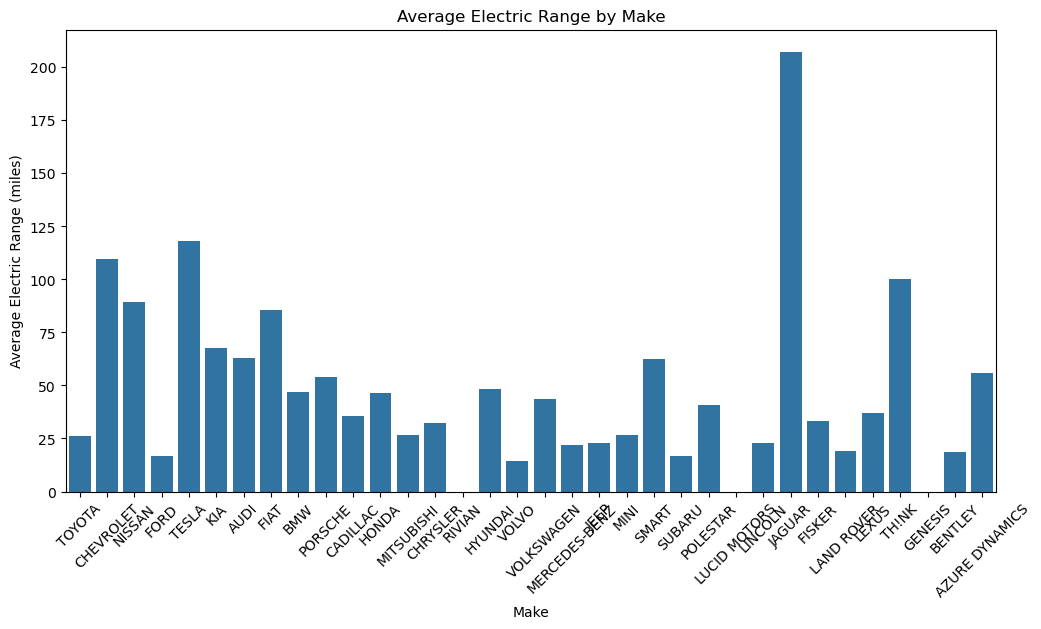

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Make', y='Electric Range', estimator='mean', ci=None)
plt.title('Average Electric Range by Make')
plt.xticks(rotation=45)
plt.ylabel('Average Electric Range (miles)')
plt.show()


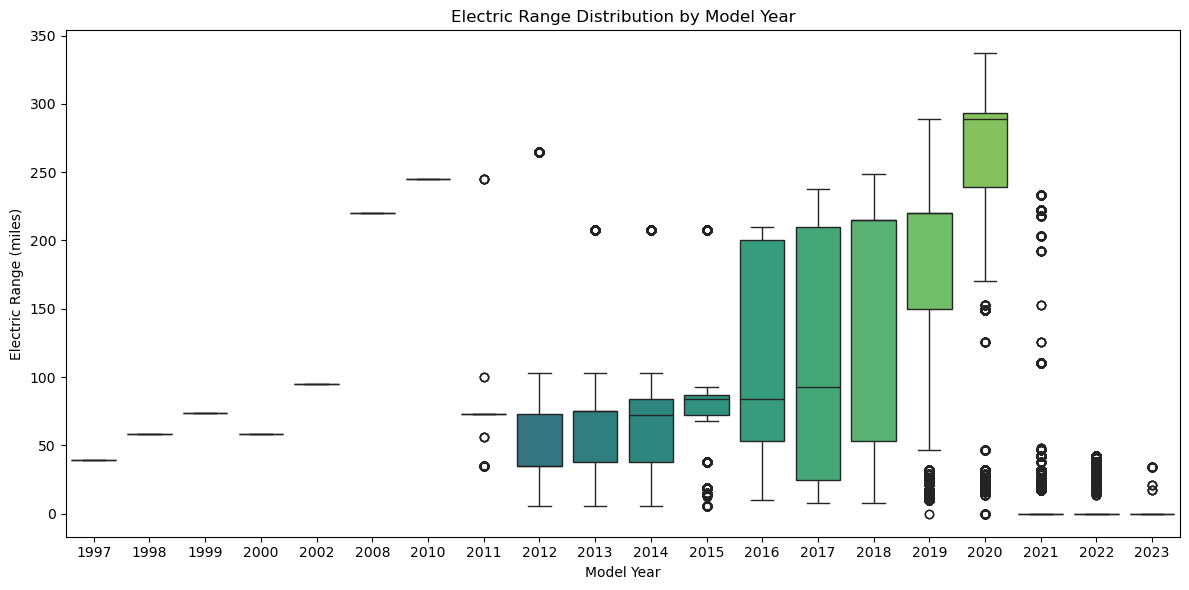

In [17]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create a box plot for Electric Range by Model Year
sns.boxplot(data=df, x='Model Year', y='Electric Range', palette='viridis')

# Add title and labels
plt.title('Electric Range Distribution by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Electric Range (miles)')

# Show the plot
plt.tight_layout()
plt.show()


<Figure size 1200x1200 with 0 Axes>

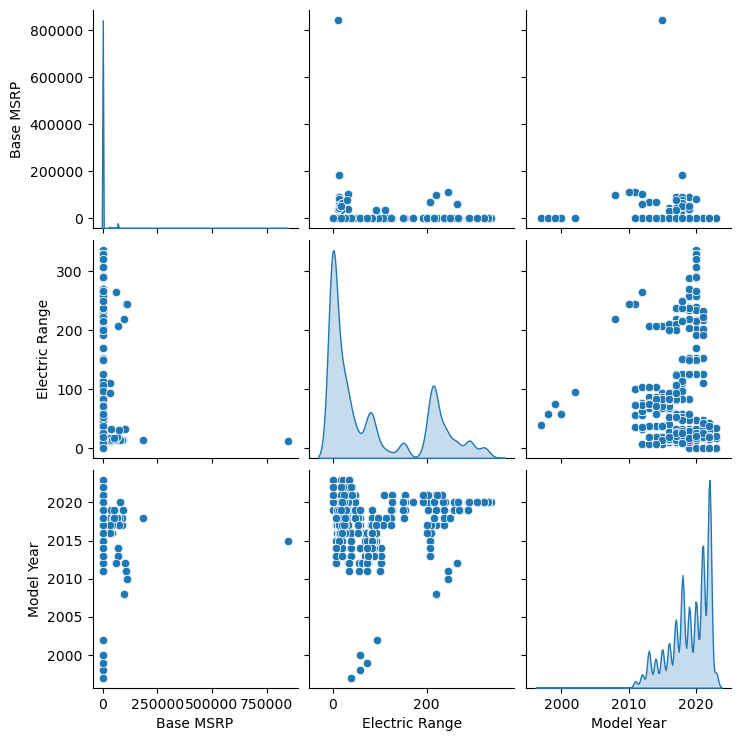

In [18]:
# Select relevant columns for pair plot
selected_columns = df[['Base MSRP', 'Electric Range', 'Model Year']]

# Set the figure size
plt.figure(figsize=(12, 12))

# Create a pair plot
sns.pairplot(selected_columns, diag_kind='kde', palette='viridis')

# Show the plot
plt.show()


In [19]:
import plotly.express as px


In [20]:
# Import necessary libraries
import plotly.express as px
import pandas as pd

# Assuming df is your DataFrame containing the EV data

# Grouping the data by state and counting the number of EVs
state_counts = df['State'].value_counts().reset_index()
state_counts.columns = ['State', 'EV Count']

# Create a choropleth map with a different color scale
fig = px.choropleth(
    state_counts, 
    locations='State', 
    locationmode='USA-states', 
    color='EV Count', 
    color_continuous_scale='Inferno',  # Changed color scale to 'Plasma'
    scope='usa', 
    labels={'EV Count': 'Number of EV Vehicles'}, 
    hover_name='State',  
    hover_data=['EV Count']
)

# Update layout for better aesthetics
fig.update_layout(
    title_text='Number of EV Vehicles by State',  
    title_x=0.5,
    geo=dict(showframe=False, projection_type='albers usa')  
)

# Show the plot
fig.show()


In [21]:
# Step 1: Import necessary libraries
import pandas as pd
import plotly.express as px

# Assuming df is your DataFrame containing the EV data

# Step 2: Create a List of all unique makes
unique_makes = df['Make'].unique()

# Step 3: Group by 'Model Year' and 'Make' to get EV count
ev_make_by_year = df.groupby(['Model Year', 'Make']).size().reset_index(name='EV Count')

# Ensure all makes appear in every year by filling missing combinations
all_years = pd.DataFrame({'Model Year': sorted(df['Model Year'].unique())})
all_combinations = all_years.assign(key=1).merge(pd.DataFrame({'Make': unique_makes, 'key': 1}), on='key').drop('key', axis=1)
ev_make_by_year_full = all_combinations.merge(ev_make_by_year, on=['Model Year', 'Make'], how='left').fillna(0)

# Step 4: Convert EV Count to integer (since it was NaN before)
ev_make_by_year_full['EV Count'] = ev_make_by_year_full['EV Count'].astype(int)

# Step 5: Create the animated racing bar plot with a visually appealing color scale
fig = px.bar(
    ev_make_by_year_full,  # Data
    x='EV Count',  # X-axis shows the count of EVs
    y='Make',  # Y-axis shows the car Make
    color='EV Count',  # Color by EV Count for a gradient effect
    color_continuous_scale=px.colors.sequential.Rainbow,  # Use Rainbow for a colorful effect
    animation_frame='Model Year',  # Animation by year
    orientation='h',  # Horizontal bar chart
    title='Electric Vehicle Makes Over the Years',
    labels={'EV Count': 'Number of EVs', 'Make': 'Car Make'},  # Axis Labels
    range_x=[0, ev_make_by_year_full['EV Count'].max() * 1.1],  # Dynamically set x-axis range
    height=800  # Increased height for better visibility
)

# Step 6: Show the plot
fig.show()
